# Tarefa 3 - Parte 1 - Classificação com KNN

### Nesta tarefa, você deve carregar o dataset `heart-disease.csv` e classificar seus registros em uma categoria binária (0: não possui Heart Disease | 1: possui Heart Disease), usando a técnica KNN e Decision Tree. Lembrem-se de aplicar as metodologias de pré-processamento e avaliar os modelos criados a partir das ferramentas mostradas em aula.

Dica: Para toda a tarefa, além da biblioteca pandas e matplotlib, você pode querer explorar funções da biblioteca de código aberto sci-kit-learn (https://scikit-learn.org/stable/index.html ), em particular os pacotes:
- preprocessing
- tree
- neighbors

## Descrição dos atributos da base de dados heart-disease (disponível no EAD):
- age (Age of the patient in years)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results). Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- target: the predicted attribute, whether it has heart disease or not.

Há 303 registros.


## Importe os pacotes

In [42]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


## Importe a base de dados

###Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD

In [43]:
df = pd.read_csv('heart-disease.csv',sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Verifique se o dataset está balanceado entre o número de casos positivos e negativos de heart disease. Sendo essa feature a coluna `['target']`

In [44]:
positivos_e_negativos = df['target'].value_counts()
print(positivos_e_negativos)

target
1    165
0    138
Name: count, dtype: int64


##Preparação da base

- Explore as técnicas de pré-processamento vistas em aula apropriadas para esse contexto, com o objetivo de aumentar a qualidade do seu modelo.

- Divida os dados em conjuntos de treino e teste. Para isso, selecione aleatoriamente e sem reposição (para que não se repitam) 75% dos registros para o conjunto de treinamento. As observações restantes (25%) serão usadas para o conjunto de teste.

Dicas:
- Fixe a semente de geração de dados aleatórios (escolha um número), utilize o comando `np.random.seed(escolha um número)`, antes de executar qualquer célula de comando que possa variar de valor resultante toda vez que for executada.

In [45]:
df.dropna(inplace=True)

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [46]:
colunas_padronizar = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

from sklearn.preprocessing import StandardScaler

df[colunas_padronizar] = StandardScaler().fit_transform(df[colunas_padronizar])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [47]:
q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75)
iqr = q3 - q1

lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

df_sem_out = df[(df['trestbps'] >= lim_inferior) & (df['trestbps'] <= lim_superior)]

In [48]:
Q1 = df_sem_out['chol'].quantile(0.25)
Q3 = df_sem_out['chol'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_chol = Q1 - 1.5 * iqr
lim_superior_chol = Q3 + 1.5 * iqr

df_sem_outl = df_sem_out[(df_sem_out['chol'] >= lim_inferior_chol) & (df_sem_out['chol'] <= lim_superior_chol)]

In [49]:
Q1 = df_sem_outl['thalach'].quantile(0.25)
Q3 = df_sem_outl['thalach'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_thalach = Q1 - 1.5 * iqr
lim_superior_thalach = Q3 + 1.5 * iqr

df_sem_outlin = df_sem_outl[(df_sem_outl['thalach'] >= lim_inferior_thalach) & (df_sem_outl['thalach'] <= lim_superior_thalach)]

In [50]:
Q1 = df_sem_outlin['oldpeak'].quantile(0.25)
Q3 = df_sem_outlin['oldpeak'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_oldpeak = Q1 - 1.5 * iqr
lim_superior_oldpeak = Q3 + 1.5 * iqr

df_sem_outliner = df_sem_outlin[(df_sem_outlin['oldpeak'] >= lim_inferior_oldpeak) & (df_sem_outlin['oldpeak'] <= lim_superior_oldpeak)]

In [51]:
Q1 = df_sem_outliner['age'].quantile(0.25)
Q3 = df_sem_outliner['age'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_oldpeak = Q1 - 1.5 * iqr
lim_superior_oldpeak = Q3 + 1.5 * iqr

df_sem_outliners = df_sem_outliner[(df_sem_outliner['age'] >= lim_inferior_oldpeak) & (df_sem_outliner['age'] <= lim_superior_oldpeak)]
df_sem_outliners.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


## Criação de conjuntos de treinamento e de teste

In [52]:
#np.random.seed(escolha um numero)

from sklearn.model_selection import train_test_split

np.random.seed(50)

X = df_sem_outliners.drop('target', axis=1)  # Features
y = df_sem_outliners['target']  # Target

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=50)

print("Número conjunto de treinamento:", X_treinamento.shape[0])
print("Número conjunto de teste:", X_teste.shape[0])

Número conjunto de treinamento: 226
Número conjunto de teste: 57


## Treine e teste o modelo de KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=3)

### Construa a matriz de confusão

Dica: você pode usar a função `confusion_matrix(_, _)` da biblioteca `scikitlearn.metrics`

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_teste)
matrix_confus= confusion_matrix(y_teste, y_pred)

print("Matriz de Confusão:")
print(matrix_confus)

Matriz de Confusão:
[[20  4]
 [ 2 31]]


**Interprete e explique a matriz de confusão gerada.**

A matriz de confusão é uma tabela que descreve o desempenho de um modelo de classificação. Dessa forma, a interpretação da matriz se dá pelos números de verdadeiros negativos, falsos positivos, falsos negativos e verdadeiros positivos. Verdadeiros Negativos: 31 casos foram corretamente classificados como ausência de doença cardíaca. Falsos Positivos: 2 casos foram incorretamente classificados como presença de doença cardíaca, ou seja, o modelo previu a presença de doença cardíaca quando na verdade não havia. Falsos Negativos: 4 casos foram incorretamente classificados como ausência de doença cardíaca, ou seja, o modelo previu a ausência de doença cardíaca quando na verdade havia. Verdadeiros Positivos: 20 casos foram corretamente classificados como presença de doença cardíaca.

### Calcule e mostre a acurácia

In [55]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, y_pred)

print("A acurácia é de:", acuracia)

A acurácia é de: 0.8947368421052632


### Calcule e mostre as métricas de precisão, cobertura (recall) e medida F1 para cada classe, além da acurácia, todas para o conjunto de teste.

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred, average=None)
cobertura = recall_score(y_teste, y_pred,average=None )
f1_yteste = f1_score(y_teste, y_pred,average=None)

print("Acurácia:", acuracia)
print("Precisão y_teste:", precisao)
print("Recall (cobertura) y_teste:", cobertura)
print("Medida F1 y_teste:", f1_yteste)

Acurácia: 0.8947368421052632
Precisão y_teste: [0.90909091 0.88571429]
Recall (cobertura) y_teste: [0.83333333 0.93939394]
Medida F1 y_teste: [0.86956522 0.91176471]


####Escolha uma das métricas previamente calculadas (acurácia, precisão, cobertura e medida F1) e calcule seu valor a partir da matriz de confusão.

In [57]:
positivos_verdad= matrix_confus[0][0]
positivos_falsos= matrix_confus[1][0]
precisao_matriz = positivos_verdad / (positivos_verdad + positivos_falsos)

print("Precisão calculada pela matriz:", precisao_matriz)

Precisão calculada pela matriz: 0.9090909090909091


## Plote uma ROC Curve e calcule a AUC (Area Under Curve) para avaliar o modelo. Explique seu funcionamento **(PONTO EXTRA)**
Dica: procure pela função `RocCurveDisplay.from_estimator`

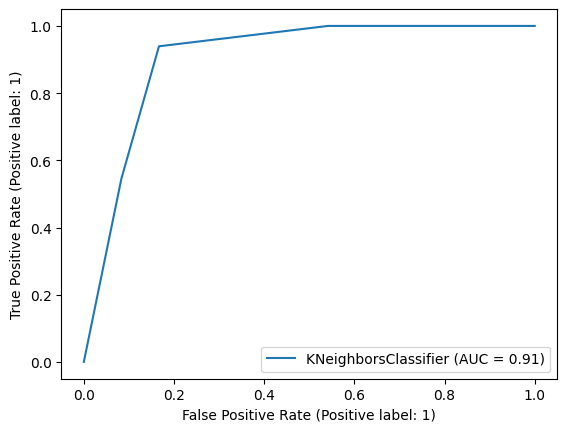

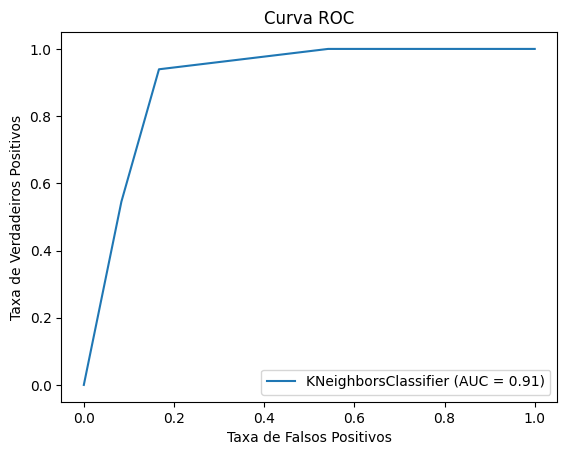

AUC : 0.9065656565656566


In [58]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Calcular as probabilidades previstas
y_proba = knn.predict_proba(X_teste)[:, 1]

# Plotar a curva ROC
roc_display = RocCurveDisplay.from_estimator(knn, X_teste, y_teste)
roc_display.plot()
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.show()

# Calcular a AUC
auc = roc_auc_score(y_teste, y_proba)
print("AUC :", auc)

A curva ROC e a AUC (area under curve) são ferramentas importantes na avaliação de modelos de classificação. A curva ROC é uma representação gráfica que mostra como o modelo está se saindo em diferentes pontos de corte, ou seja, diferentes limiares de classificação. Ela plota a taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) em uma escala de 0 a 1. O TPR representa a proporção de casos positivos que o modelo classifica corretamente, enquanto o FPR representa a proporção de casos negativos que o modelo classifica incorretamente como positivos. A AUC é a área sob a curva ROC e fornece uma medida do desempenho global do modelo. Quanto maior a AUC, melhor o modelo está em distinguir entre as classes positiva e negativa. Dessa forma, a curva ROC e a AUC nos ajudam a entender o quão bem nosso modelo está performando em diferentes cenários de classificação, permitindo-nos avaliar sua eficácia de forma abrangente e intuitiva.Responda aqui...

# Tarefa 3 - Parte 2 - Classificação com Árvore de Decisão
Depois de criar e avaliar seu modelo KNN agora queremos que crie um modelo que use Decision Tree, a ideia é avaliar qual dos dois tem melhor desempenho em predizer se o paciente possui uma doença no coração ou não.

##A partir dos conjuntos de treinamento já criados e normalizados anteriormente, crie e treine seu modelo de Árvore de Decisão

Dica: procure por `DecisionTreeClassifier` no `scikitlearn`



In [59]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_de_decisao = DecisionTreeClassifier(random_state=50)

modelo_arvore_de_decisao.fit(X_treinamento, y_treinamento)

y_pred_arvore_decisao = modelo_arvore_de_decisao.predict(X_teste)

### Calcule a acurácia da predição sobre o conjunto de teste

In [60]:

acuracia_arvore_decisao= accuracy_score(y_teste, y_pred_arvore_decisao)
print("Acurácia do modelo:", acuracia_arvore_decisao)

Acurácia do modelo: 0.8947368421052632


### Construa e mostre a Matriz de confusão
Dica: você pode usar a função `confusion_matrix(_, _)` da biblioteca `scikitlearn.metrics`

In [61]:
matriz_confusao_arvore_decisao= confusion_matrix(y_teste, y_pred_arvore_decisao)

print("Matriz de Confusão da árvore de Decisão:")
print(matriz_confusao_arvore_decisao)


Matriz de Confusão da árvore de Decisão:
[[21  3]
 [ 3 30]]


### Calcule e mostre as métricas de precisão, cobertura (recall) e medida F1 para cada classe, além da acurácia, todas para o conjunto de teste.
Dica: você pode usar a função `classification_report(_, _)` da biblioteca `scikitlearn.metrics`


In [62]:
from sklearn.metrics import classification_report

Relatorio = classification_report(y_teste, y_pred_arvore_decisao)

print("Relatório de Classificação:")
print(Relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.91      0.91      0.91        33

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



## Visualize o modelo
Visualize graficamente a árvore de decisão aprendida

Dica:
* Procure pelo comando `.plot_tree()`
* Provavelmente a árvore plotada vai ser bem grande e difícil de visualizar o conteúdo de cada galho, use o comando `plt.figure(figsize=(30,15))` para aumentar o tamanho da imagem

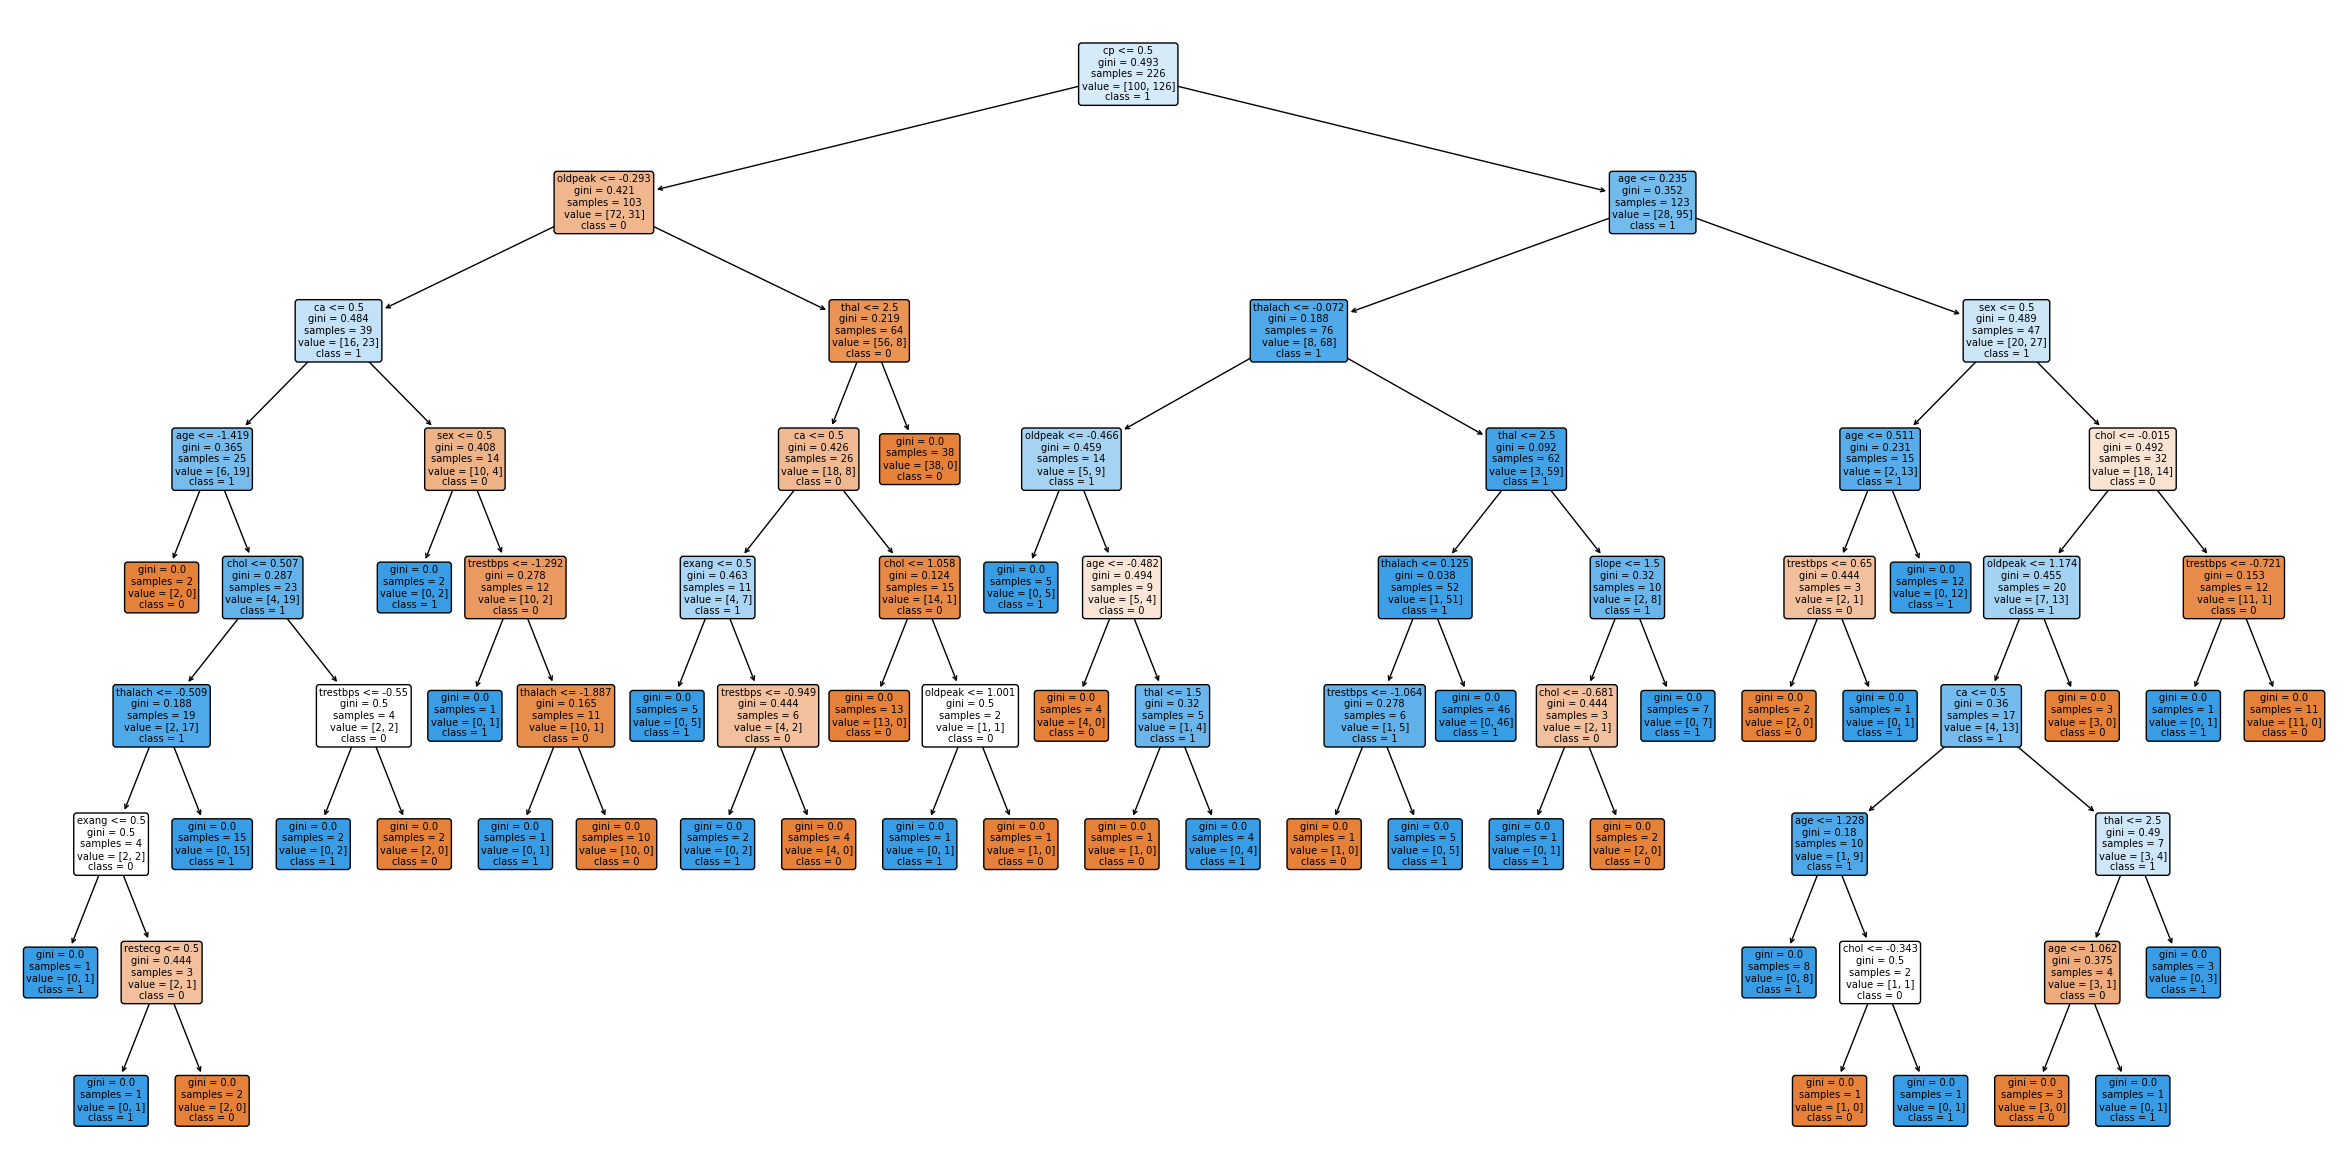

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))

plot_tree(modelo_arvore_de_decisao,feature_names=X.columns, filled=True, class_names=['0', '1'], rounded=True)

plt.show()


## Explique o modelo
Explique a estrutura da árvore visualizada, com suas palavras.

As árvores de decisão são uma técnica muito utilizada em aprendizado supervisionado. Nesse modelo, cada nó da árvore representa uma decisão com base nas características dos dados. Durante o treinamento, a árvore busca dividir o conjunto de dados em grupos mais homogêneos, reduzindo assim a incerteza nos diferentes nós. Para medir essa incerteza, usamos o índice de Gini, que avalia o quão misturadas estão as classes dentro de um nó. As classes representam as categorias ou valores de destino que estamos tentando prever. O processo de divisão é orientado pela escolha das features que proporcionam a maior redução na impureza. Isso significa que as características mais importantes, que mais contribuem para a diferenciação das classes, são selecionadas para as primeiras divisões na árvore.

Cada nó da árvore representa um ponto de decisão, onde o modelo faz uma pergunta sobre uma determinada característica dos dados. Com base na resposta a essa pergunta, as amostras são encaminhadas para diferentes ramos da árvore. Esse processo continua até que as amostras alcancem uma folha, que é um nó final da árvore onde não ocorrem mais subdivisões, pois já chegou num resultado homogêneo ou acabou as features. Nessas folhas, o modelo faz uma previsão de classe para as amostras com base nas características dos dados que alcançaram essa folha.

O número de amostras em cada nó da árvore é representado pelo valor de "value",mostrando a distribuição das classes nas amostras que caem em um determinado nó. Por exemplo, se um nó tem [3, 5], significa que há 3 instâncias pertencentes à classe 0 e 5 instâncias pertencentes à classe 1.













## Cria exemplos fictícios
Crie 2 exemplos fictícios (um para cada classe do target) que você saiba o resultado final olhando apenas para a estrutura da árvore, e descreva o caminho que eles fariam.

In [64]:
exemplo_1_target = [[40, 1, 0,-1, 197, 0, 0, 129, 1, 0.5, 1,0,1]]


exemplo_0_target =[[67, 0, 0, -0.7,231,1,1,188,1,0.5, 2, 0, 1 ]]


Exemplo 1: começamos com cp sendo inferior a 0,5 (o valor é 0). Em seguida, temos o oldpeak maior ou igual a -0.293 (0.5). Depois, temos thal inferior a 2.5 (o valor é 1). Em seguida, o ca era menor que 0.5 (0). Depois, exang tinha que ser maior que 0,5 (o valor é 1). Por fim, trestbps seria menor que -0.949 (o valor foi -1).

Exemplo 0: começamos com cp sendo inferior a 0,5 (o valor é 0). Em seguida, temos o oldpeak maior ou igual a -0.293 (0.5). Depois, temos thal inferior a 2.5 (o valor é 1). Em seguida, o ca era menor que 0.5 (0). Depois, exang tinha que ser maior que 0,5 (o valor é 1). Por fim, trestbps seria menor que -0.949 (o valor foi -0.7).

## Execute a inferência na árvore
Agora execute a inferência na árvore utilizando os 2 exemplos fictícios que você criou.

Dica: procure pelo método ``predict``


In [65]:
previsao_exemplo_1 = modelo_arvore_de_decisao.predict(exemplo_1_target)
previsao_exemplo_0 = modelo_arvore_de_decisao.predict(exemplo_0_target)

print("exemplo 1 (com doença ):", exemplo_1_target)
print("exemplo 1 --> previsão:", previsao_exemplo_1)

print("exemplo 0 (sem doença):", exemplo_0_target)
print("exemplo 0 --> previsão:", previsao_exemplo_0)

exemplo 1 (com doença ): [[40, 1, 0, -1, 197, 0, 0, 129, 1, 0.5, 1, 0, 1]]
exemplo 1 --> previsão: [1]
exemplo 0 (sem doença): [[67, 0, 0, -0.7, 231, 1, 1, 188, 1, 0.5, 2, 0, 1]]
exemplo 0 --> previsão: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Agora execute essa mesma inferência utilizando o KNN e verifique se ambos modelos dão o mesmo resultado

In [66]:
previsoes1_knn = knn.predict(exemplo_1_target)
previsoes0_knn = knn.predict(exemplo_0_target)

print("Previsões KNN:")
print("exemplo 1 --> previsão:", previsoes1_knn)
print("exemplo 0 --> previsão:", previsoes0_knn)

Previsões KNN:
exemplo 1 --> previsão: [1]
exemplo 0 --> previsão: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Visualize a contribuição de cada feature no modelo

Crie um gráfico de barras que mostre o coeficiente de importância que a árvore de decisão deu para cada feature.

Dica: o atributo `.feature_importances_` da árvore retorna um array com o valor da importância de cada coluna do df

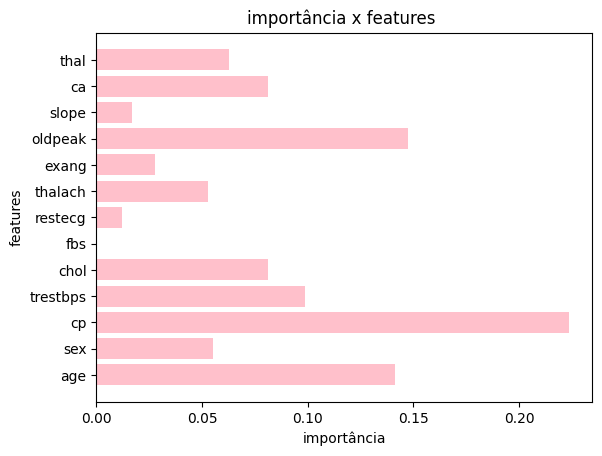

In [67]:
importancias_features = modelo_arvore_de_decisao.feature_importances_
nomes_features = df_sem_outliners.columns[:-1]

plt.barh(nomes_features, importancias_features, color='pink')
plt.xlabel('importância')
plt.ylabel('features')
plt.title('importância x features ')
plt.show()

## Compare os modelos

Agora com os dois modelos criados e treinados (KNN e Árvore de Decisão), compare os dois graficamente utilizando alguma métrica de avaliação como base (acurácia, precisão e etc)

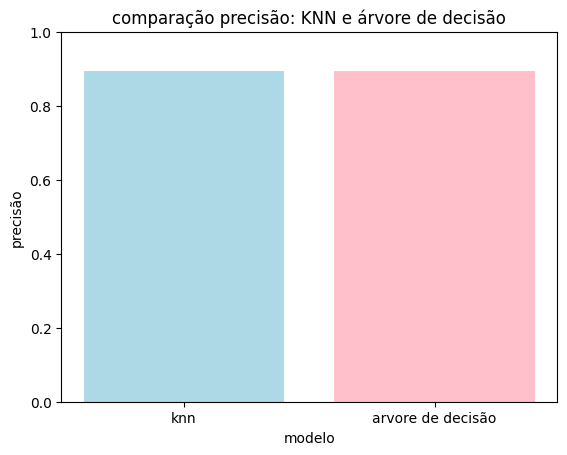

In [68]:
y_pred_knn = knn.predict(X_teste)
y_pred_arvore = modelo_arvore_de_decisao.predict(X_teste)

precisao_knn = accuracy_score(y_teste, y_pred_knn)
precisao_arvore = accuracy_score(y_teste, y_pred_arvore)

modelos = ['knn', 'arvore de decisão']
precisoes = [precisao_knn, precisao_arvore]

plt.bar(modelos, precisoes, color=['lightblue', 'pink'])
plt.xlabel('modelo')
plt.ylabel('precisão')
plt.title('comparação precisão: KNN e árvore de decisão')
plt.ylim(0, 1)
plt.show()

## Interprete os resultados

- Qual dos 2 modelos foi o melhor? Consegue pensar em alguma justificativa para o resultado ter sido esse?
- Acha que esses modelos seriam eficientes para serem utilizados na vida real?
- O que acha que ainda poderia ser feito para melhorar o desempenho desses modelos?

Embora os dois modelos tenham a mesma precisão e acurácia, pelas matrizes de confusão de ambos, percebemos que há diferenças nelas. Enquanto a matriz de confusão do KNN possui 20 verdadeiros positivos, 31 verdadeiros negativos, 4 falsos negativos e 2 falsos verdadeiros, a matriz da árvore de decisão tem 21 verdadeiros positivos, 30 verdadeiros negativos, 3 falsos negativos e 3 falsos verdadeiros. Dessa forma, percebemos que os modelos classificam os dados de formas diferente, desencadeando predições diferentes mesmo possuindo a mesma precisão e acurácia. Justamente por possuirem a mesma precisão e acurácia, não é possível prever com esses valores qual modelo é melhor. Apesar de terem erros, pois nenhum modelo é 100% correto, possuem uma acurária e precisao alta, mostrando que eles são eficientes.Para melhorar o modelo poderia ser feitos mais testes e ter usado uma base de treino maior.

## Retreine os modelos com as features mais importantes

Agora utilizando o conhecimento adquirido com a análise de Feature Importance da Árvore de Decisão, retreine ambos os modelos (KNN e Árvore de Decisão) apenas utilizando as 10 features mais importantes. Após treinar esses novos modelos, compare o desempenho desses com os anteriores (que utilizavam todas as 13 features).

Por meio do gráfico podemos perceber que as 10 features mais importantes são:thal,ca,oldpeak, thalach,chol,trestbps,cp,sex,age, exang

In [69]:
novo_df=df_sem_outliners.drop(['fbs','slope','restecg'], axis=1)
novo_df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,0.015443,0,1.087338,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,1.633471,0,2.122573,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0.977514,0,0.310912,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,1.239897,0,-0.206705,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0.583939,1,-0.379244,0,2,1


In [70]:
#KNN
X=novo_df.drop('target',axis=1)
y=novo_df['target']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [72]:
knn_novo= KNeighborsClassifier(n_neighbors=3) # foram testdos varios valores para n, mas n=3 possuia maior acuracia

knn_novo.fit(X_train, y_train)
y_pred_knn = knn_novo.predict(X_test)

y_pred_knn_ = knn_novo.predict(X_test)
accuracy_knn_ = accuracy_score(y_test, y_pred_knn_)

In [73]:
# árvore

arvore=DecisionTreeClassifier(random_state=0)
arvore.fit(X_treinamento,y_treinamento)

y_pred_tree= arvore.predict(X_teste)
acuracia_novo_arvore=accuracy_score(y_teste,y_pred_tree)


In [74]:
print(f'acurácia antiga arvore : {acuracia_arvore_decisao}')
print(f'acurácia arvore (top 10 features): {acuracia_novo_arvore}\n')

print(f'acurácia antiga KNN: {acuracia}')
print(f'acurácia KNN (top 10 features): {accuracy_knn_}')

acurácia antiga arvore : 0.8947368421052632
acurácia arvore (top 10 features): 0.8771929824561403

acurácia antiga KNN: 0.8947368421052632
acurácia KNN (top 10 features): 0.8596491228070176


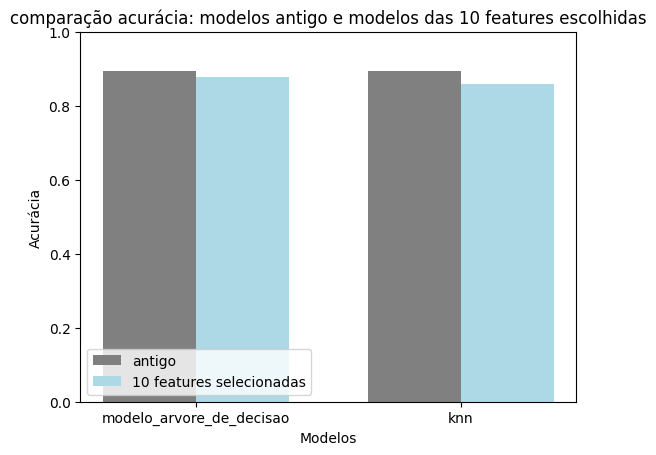

In [75]:
acc_antigas = [acuracia_arvore_decisao, acuracia]
acc_novas = [acuracia_novo_arvore, accuracy_knn_]

modelos = ['modelo_arvore_de_decisao', 'knn']
método = ['antigo', ' 10 features selecionadas']

fig, ax = plt.subplots()

barra1 = ax.bar(range(len(modelos)), acc_antigas, 0.35, label='antigo',color='gray')
barra2 = ax.bar([i+ 0.35 for i in range(len(modelos))], acc_novas, 0.35, label='10 features selecionadas', color='lightblue')

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('comparação acurácia: modelos antigo e modelos das 10 features escolhidas')
plt.xticks([i + 0.35 / 2 for i in range(len(modelos))], modelos)
plt.ylim(0, 1)

plt.legend(loc='lower left' , ncols=1)

plt.show()

Como observado no gráfico, o desempenho de ambas reduziu ao se ter menos dados para realizar o treinamento.

# Regressão logística

### Recupere a tarefa de Classificação e execute o modelo de Regressão Logística com os dados de heart-disease, se atentando às etapas desejáveis para alcançar um bom desempenho do modelo.

# Pré-processamento

In [76]:
df_heart = pd.read_csv('heart-disease.csv',sep=',')
df_heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
#normalização

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_heart[['age', 'trestbps','chol','thalach','oldpeak']] = scaler.fit_transform(df_heart[['age', 'trestbps', 'chol','thalach','oldpeak']])

In [78]:
#verificar valores ausentes

dados_faltantes = df_heart.isnull().sum()
print(dados_faltantes)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [79]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [82]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# regressao logistica
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# previsoes
y_pred = logistic_regression.predict(X_test_scaled)

# matriz de confusao
matriz = confusion_matrix(y_test, y_pred)

print("\nRelatório de Regressão Logística:")
print(classification_report(y_test, y_pred))


Relatório de Regressão Logística:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.84      0.86      0.85        42

    accuracy                           0.82        71
   macro avg       0.81      0.81      0.81        71
weighted avg       0.82      0.82      0.82        71




KNN


Acurácia: 0.8947368421052632


Precisão y_teste: [0.90909091 0.88571429]


Recall (cobertura) y_teste: [0.83333333 0.93939394]


Medida F1 y_teste: [0.86956522 0.91176471]

ÁRVORE DE DECISÃO



In [81]:
from sklearn.metrics import classification_report

Relatorio = classification_report(y_teste, y_pred_arvore_decisao)

print("Relatório de Classificação da Árvore de Decisão:")
print(Relatorio)

Relatório de Classificação da Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.91      0.91      0.91        33

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



### Em seguida, compare os resultados das medidas de desempenho obtidos com os modelos anteriores de classificação (..) com o modelo de Regressão Logística. Comente possíveis motivos para tal desempenho.

Comparando os modelos é perceptível que a acurácia do knn e árvore de decisão é semelhante (0,88 ou 0,89), enquanto a da regressao logistica é mais baixa(0,82). Para as outras métricas, há algumas diferenças. A regressao possui um recall um pouco pior para a classe 0 (0.76), enquanto o KNN tem um recall superior para a classe 1 (0.939). Por outro lado, a arvore tem uma precisao melhor para a target=1. Essa diferença entre as métrias podem ser derivadas da natureza de cada modelo. A regressão assume uma linearidade entre variaveis, enquanto a arvore e knn lidam com relações nao lineares de uma forma mais flexivel em comparação. A arvore consegue assimilar interações mais intrincadas nos dados, o que pode justificar sua precisão um pouco superior para a classe 1. Em contrapartida, o knn realiza a classificação considerando os k vizinhos mais proximos. Assim, os resultados podem ser impactados pela escolha do número de vizinhos (k) e pela métrica de distância selecionada (euclidiana, manhattan, entre outras).